# Stock Prediction Using LSTM

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import yfinance as yf

from datetime import datetime


## 1.  Data Collection

In [2]:
now = datetime.now()

In [3]:
# Download yahoo finance

# a ticker is a unique symbol or series of letters assigned to a publicly traded company for identification purposes. 
# It is used to represent the company's stock on an exchange.
ticker = 'AAPL'
# get data of 10 years from yahoo finance
start = datetime(now.year-10, now.month, now.day)
end = now
df = yf.download(ticker, start, end)

df


[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2014-12-15,24.102207,27.057501,27.900000,26.587500,27.674999,268872400
2014-12-16,23.772621,26.687500,27.540001,26.565001,26.592501,243162800
2014-12-17,24.364983,27.352501,27.459999,26.705000,26.780001,213647200
2014-12-18,25.086515,28.162500,28.162500,27.665001,27.967501,236024800
2014-12-19,24.892775,27.945000,28.309999,27.915001,28.065001,353719200
...,...,...,...,...,...,...
2024-12-09,246.750000,246.750000,247.240005,241.750000,241.830002,44649200
2024-12-10,247.770004,247.770004,248.210007,245.339996,246.889999,36914800


In [4]:
# Check DataFrame head
df.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2014-12-15,24.102207,27.057501,27.900000,26.587500,27.674999,268872400
2014-12-16,23.772621,26.687500,27.540001,26.565001,26.592501,243162800
2014-12-17,24.364983,27.352501,27.459999,26.705000,26.780001,213647200
2014-12-18,25.086515,28.162500,28.162500,27.665001,27.967501,236024800
2014-12-19,24.892775,27.945000,28.309999,27.915001,28.065001,353719200


In [5]:
# Check the tail
df.tail()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2024-12-09,246.750000,246.750000,247.240005,241.750000,241.830002,44649200
2024-12-10,247.770004,247.770004,248.210007,245.339996,246.889999,36914800
2024-12-11,246.490005,246.490005,250.800003,246.259995,247.960007,45205800
2024-12-12,247.960007,247.960007,248.740005,245.679993,246.889999,32777500
2024-12-13,248.130005,248.130005,249.289993,246.240005,247.820007,33132000


## 2. Data Exploration & Visualization

In [6]:
df

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2014-12-15,24.102207,27.057501,27.900000,26.587500,27.674999,268872400
2014-12-16,23.772621,26.687500,27.540001,26.565001,26.592501,243162800
2014-12-17,24.364983,27.352501,27.459999,26.705000,26.780001,213647200
2014-12-18,25.086515,28.162500,28.162500,27.665001,27.967501,236024800
2014-12-19,24.892775,27.945000,28.309999,27.915001,28.065001,353719200
...,...,...,...,...,...,...
2024-12-09,246.750000,246.750000,247.240005,241.750000,241.830002,44649200
2024-12-10,247.770004,247.770004,248.210007,245.339996,246.889999,36914800


In [7]:
# check the type of data we are working with
type(df)

pandas.core.frame.DataFrame

In [8]:
# Check the shape of the dataframe
df.shape

(2517, 6)

In [9]:
# Check for null values
df.isna().sum()

Price      Ticker
Adj Close  AAPL      0
Close      AAPL      0
High       AAPL      0
Low        AAPL      0
Open       AAPL      0
Volume     AAPL      0
dtype: int64

In [10]:
# Describe the data - get statiscal overview of the dataframe
df.describe()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
count,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2.517000e+03
mean,93.256790,95.351004,96.280673,94.322218,95.267169,1.176805e+08
std,65.045185,64.575766,65.171076,63.895302,64.503610,6.859108e+07
min,20.697264,22.584999,22.917500,22.367500,22.500000,2.404830e+07
25%,34.906975,37.240002,37.532501,36.689999,37.075001,7.131110e+07
50%,63.656219,65.617500,66.220001,65.169998,65.647499,1.008056e+08
75%,149.833328,151.729996,153.589996,150.059998,151.410004,1.430268e+08
max,248.130005,248.130005,250.800003,246.259995,247.960007,6.488252e+08


In [11]:
# Check the data types of the columns
df.dtypes

Price      Ticker
Adj Close  AAPL      float64
Close      AAPL      float64
High       AAPL      float64
Low        AAPL      float64
Open       AAPL      float64
Volume     AAPL        int64
dtype: object

In [12]:
df.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2014-12-15,24.102207,27.057501,27.900000,26.587500,27.674999,268872400
2014-12-16,23.772621,26.687500,27.540001,26.565001,26.592501,243162800
2014-12-17,24.364983,27.352501,27.459999,26.705000,26.780001,213647200
2014-12-18,25.086515,28.162500,28.162500,27.665001,27.967501,236024800
2014-12-19,24.892775,27.945000,28.309999,27.915001,28.065001,353719200


In [13]:
# Reset the index of the dataframe
df = df.reset_index()


In [14]:
df

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
0,2014-12-15,24.102207,27.057501,27.900000,26.587500,27.674999,268872400
1,2014-12-16,23.772621,26.687500,27.540001,26.565001,26.592501,243162800
2,2014-12-17,24.364983,27.352501,27.459999,26.705000,26.780001,213647200
3,2014-12-18,25.086515,28.162500,28.162500,27.665001,27.967501,236024800
4,2014-12-19,24.892775,27.945000,28.309999,27.915001,28.065001,353719200
...,...,...,...,...,...,...,...
2512,2024-12-09,246.750000,246.750000,247.240005,241.750000,241.830002,44649200
2513,2024-12-10,247.770004,247.770004,248.210007,245.339996,246.889999,36914800
2514,2024-12-11,246.490005,246.490005,250.800003,246.259995,247.960007,45205800


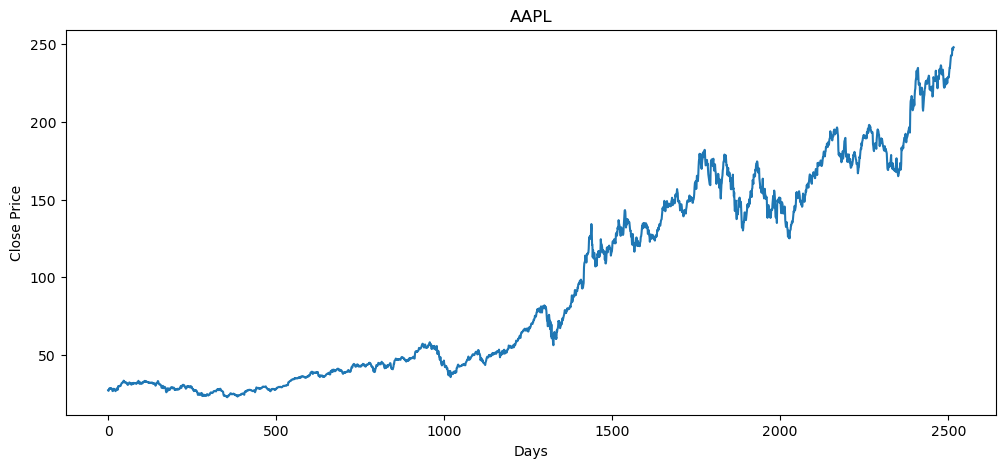

In [15]:
# Virtualize the data
# plt.figure() creates a new figure --- canvas for plots on which you can add subplots or charts.
# figsize=(12, 5) Specifies the dimensions of the figure in inches 
# 12 inches wide and 5 inches tall figure
plt.figure(figsize=(12, 5));
plt.plot(df.Close);
plt.title(ticker);
plt.xlabel('Days');
plt.ylabel('Close Price');

## 3. Feature Engineering

#### Understanding Moving Average

The moving average is a calculation used to analyze data points by creating a series of averages of different subsets of the full data set. It’s commonly used in stock market analysis to smooth out short-term fluctuations and identify trends.

In [16]:
# # How to calculate moving average
# example_stock_data = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# # Moving average of 5 days:

# moving average of 5th data is 30
# ie (10 + 20 + 30 + 40 + 50)/ 5
# null, null, null, null, 30

# moving average of 6th data is 30
# ie (10 + 20 + 30 + 40 + 50)/ 5
# null, null, null, null, 40

In [17]:
example_stock_data = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
print(sum(example_stock_data[:5])/5)

30.0


In [18]:
example_stock_data = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
print(sum(example_stock_data[1:6])/5)

40.0


#### Calculating moving average programatically

In [19]:
df1 = pd.DataFrame([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
df1

,0
0,10
1,20
2,30
3,40
4,50
5,60
6,70
7,80
8,90
9,100


In [20]:

df1['MA_5'] = df1.rolling(5).mean()
df1

,0,MA_5
0,10,NaN
1,20,NaN
2,30,NaN
3,40,NaN
4,50,30.0
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,100,80.0


### 100 Days moving average

In [21]:
df['MA_100'] = df.Close.rolling(100).mean()
df.head(200)

Price,Date,Adj Close,Close,High,Low,Open,Volume,MA_100
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,
0,2014-12-15,24.102207,27.057501,27.900000,26.587500,27.674999,268872400,NaN
1,2014-12-16,23.772621,26.687500,27.540001,26.565001,26.592501,243162800,NaN
2,2014-12-17,24.364983,27.352501,27.459999,26.705000,26.780001,213647200,NaN
3,2014-12-18,25.086515,28.162500,28.162500,27.665001,27.967501,236024800,NaN
4,2014-12-19,24.892775,27.945000,28.309999,27.915001,28.065001,353719200,NaN
...,...,...,...,...,...,...,...,...
195,2015-09-24,25.935177,28.750000,28.875000,28.092501,28.312500,200878000,30.475600
196,2015-09-25,25.869778,28.677500,29.172501,28.504999,29.110001,224607600,30.447875
197,2015-09-28,25.357843,28.110001,28.642500,28.110001,28.462500,208436000,30.416450


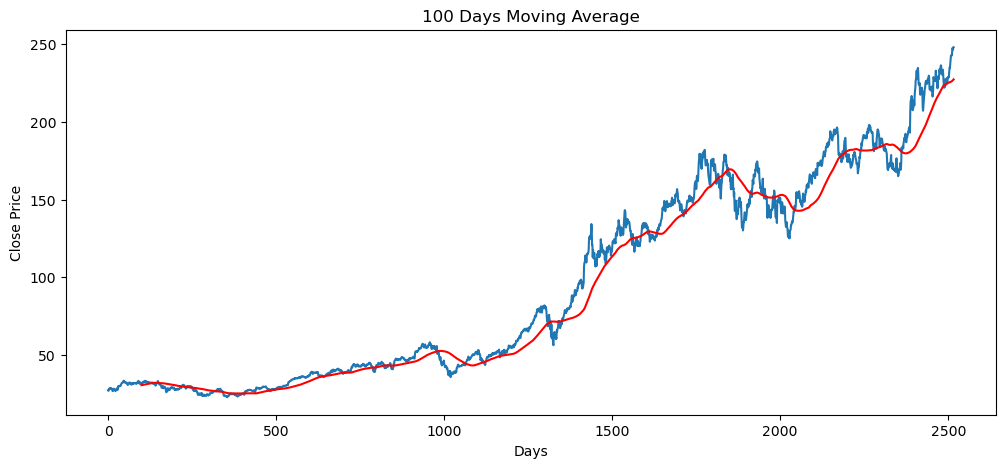

In [22]:
plt.figure(figsize=(12, 5));
plt.plot(df.Close);

plt.plot(df['MA_100'], 'r');

plt.title('100 Days Moving Average');
plt.xlabel('Days');
plt.ylabel('Close Price');



### 200 Days moving average

In [23]:
df['MA_200'] = df.Close.rolling(200).mean()
df.head(300)

Price,Date,Adj Close,Close,High,Low,Open,Volume,MA_100,MA_200
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,,
0,2014-12-15,24.102207,27.057501,27.900000,26.587500,27.674999,268872400,NaN,NaN
1,2014-12-16,23.772621,26.687500,27.540001,26.565001,26.592501,243162800,NaN,NaN
2,2014-12-17,24.364983,27.352501,27.459999,26.705000,26.780001,213647200,NaN,NaN
3,2014-12-18,25.086515,28.162500,28.162500,27.665001,27.967501,236024800,NaN,NaN
4,2014-12-19,24.892775,27.945000,28.309999,27.915001,28.065001,353719200,NaN,NaN
...,...,...,...,...,...,...,...,...,...
295,2016-02-18,21.920101,24.065001,24.722500,24.022499,24.709999,156084000,27.181700,28.828650
296,2016-02-19,21.870007,24.010000,24.190001,23.950001,24.000000,141496800,27.135025,28.791450
297,2016-02-22,22.061289,24.219999,24.225000,23.980000,24.077499,137123200,27.096125,28.756287


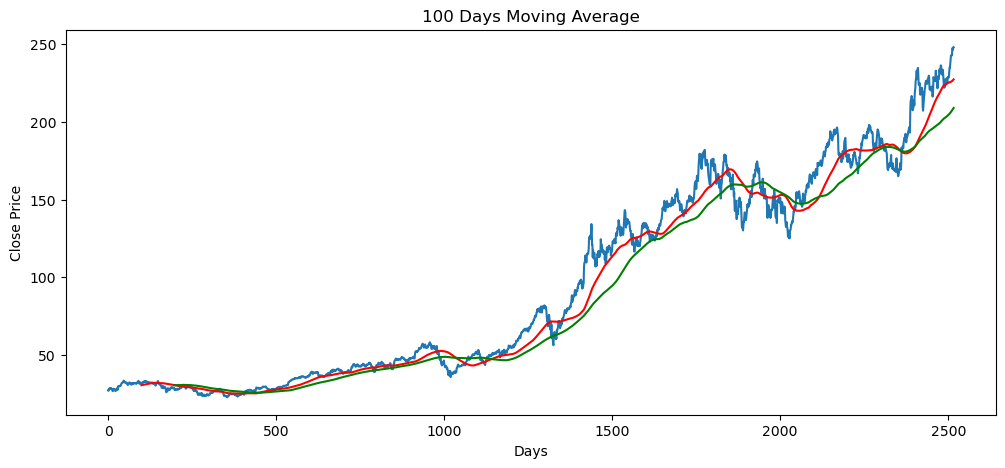

In [25]:
plt.figure(figsize=(12, 5));
plt.plot(df.Close);

plt.plot(df['MA_100'], 'r');
plt.plot(df['MA_200'], 'g');

plt.title('100 Days Moving Average');
plt.xlabel('Days');
plt.ylabel('Close Price');

In [26]:
df

Price,Date,Adj Close,Close,High,Low,Open,Volume,MA_100,MA_200
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,,
0,2014-12-15,24.102207,27.057501,27.900000,26.587500,27.674999,268872400,NaN,NaN
1,2014-12-16,23.772621,26.687500,27.540001,26.565001,26.592501,243162800,NaN,NaN
2,2014-12-17,24.364983,27.352501,27.459999,26.705000,26.780001,213647200,NaN,NaN
3,2014-12-18,25.086515,28.162500,28.162500,27.665001,27.967501,236024800,NaN,NaN
4,2014-12-19,24.892775,27.945000,28.309999,27.915001,28.065001,353719200,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2512,2024-12-09,246.750000,246.750000,247.240005,241.750000,241.830002,44649200,226.4297,207.63115
2513,2024-12-10,247.770004,247.770004,248.210007,245.339996,246.889999,36914800,226.6643,207.96420
2514,2024-12-11,246.490005,246.490005,250.800003,246.259995,247.960007,45205800,226.8896,208.28350


### Calculating % changed in each trading session

In [27]:
df['Percentage Changed'] = df.Close.pct_change()
df[['Close', 'Percentage Changed']]

Price,Close,Percentage Changed
Ticker,AAPL,
0,27.057501,NaN
1,26.687500,-0.013675
2,27.352501,0.024918
3,28.162500,0.029613
4,27.945000,-0.007723
...,...,...
2512,246.750000,0.016101
2513,247.770004,0.004134
2514,246.490005,-0.005166


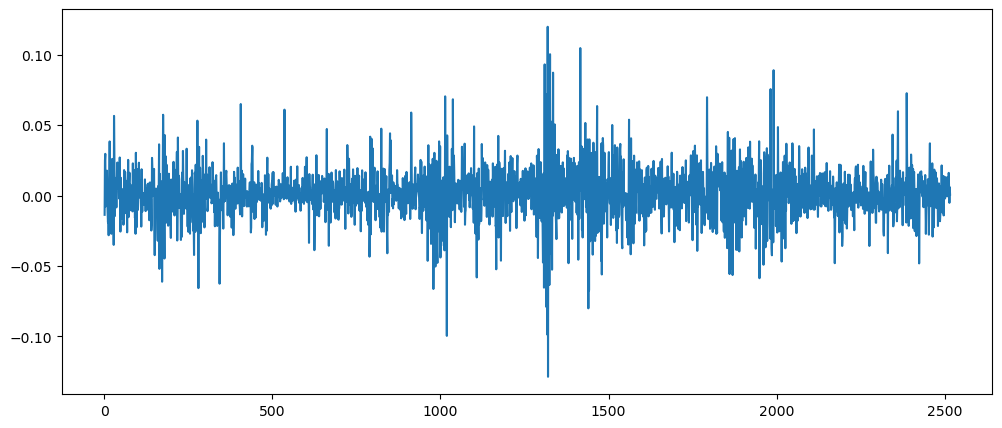

In [28]:
plt.figure(figsize=(12, 5));
plt.plot(df['Percentage Changed']);

## 4. Data Preprocessing

In [29]:
df.shape

(2517, 10)

#### Splitting data into Tranning and Testing datasets

In [33]:
# Split data
data_training = pd.DataFrame(df.Close[0:int(len(df)*0.7)])
print(data_training)

data_testing = pd.DataFrame(df.Close[int(len(df)*0.7): int(len(df))])
print(data_testing)


Ticker        AAPL
0        27.057501
1        26.687500
2        27.352501
3        28.162500
4        27.945000
...            ...
1756    165.320007
1757    171.179993
1758    175.080002
1759    174.559998
1760    179.449997

[1761 rows x 1 columns]
Ticker        AAPL
1761    175.740005
1762    174.330002
1763    179.300003
1764    172.259995
1765    171.139999
...            ...
2512    246.750000
2513    247.770004
2514    246.490005
2515    247.960007
2516    248.130005

[756 rows x 1 columns]


#### Scaling the data

##### Purpose of Scaling/Normalization
Scaling or normalization ensures that the features in your dataset are on a similar scale, which:

 - Improves the performance of machine learning algorithms that are sensitive to feature scaling (e.g., gradient descent in neural networks, SVMs, k-NN, etc.).

 - Prevents features with larger values from dominating those with smaller values.

In [35]:
# Scaling down the data between 0 and 1

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [38]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.02851179],
       [0.02615307],
       [0.03039239],
       ...,
       [0.97214168],
       [0.9688267 ],
       [1.        ]])

In [39]:
type(data_training_array)

numpy.ndarray

In [40]:
data_training_array.shape

(1761, 1)

## 5. Sequence Creation

Creating sequences in machine learning is particularly important when working with time-series data, sequence data, or any data where the order of observations matters. Sequences allow machine learning models to capture temporal or sequential patterns, dependencies, and trends, which are essential for making accurate predictions in certain contexts.

LSTM models requires that the input models to be in a sequencial manner

We also have to understand that our tomorrow stock price is dependent on previous few days price

In [43]:
x_train = []
y_train = []

# our model should look at 100 days data and predict the next day price

# Starts at index 100 and iterates to the end of the dataset.
# The value 100 represents the sequence length (window size).
# The first 100 data points are used to predict the 101st value.
for i in range(100, data_training_array.shape[0]):

    # Extracts a sequence of 100 consecutive rows ending at index i (not including i).
    # his forms the input for the model (x_train).
    x_train.append(data_training_array[i-100: i])

    # Picks the value at the i-th row and 0-th column (usually the target variable).
    # This forms the label for the model (y_train).
    y_train.append(data_training_array[i, 0])

# x_train

# Convert the data into numpy array
x_train, y_train = np.array(x_train), np.array(y_train)

In [44]:
x_train

array([[[0.02851179],
        [0.02615307],
        [0.03039239],
        ...,
        [0.05525453],
        [0.05565296],
        [0.05941416]],

       [[0.02615307],
        [0.03039239],
        [0.03555606],
        ...,
        [0.05565296],
        [0.05941416],
        [0.05734231]],

       [[0.03039239],
        [0.03555606],
        [0.03416951],
        ...,
        [0.05941416],
        [0.05734231],
        [0.05662513]],

       ...,

       [[0.76412839],
        [0.78771553],
        [0.78293435],
        ...,
        [0.88773786],
        [0.90992261],
        [0.94727948]],

       [[0.78771553],
        [0.78293435],
        [0.79185928],
        ...,
        [0.90992261],
        [0.94727948],
        [0.97214168]],

       [[0.78293435],
        [0.79185928],
        [0.80307908],
        ...,
        [0.94727948],
        [0.97214168],
        [0.9688267 ]]])

In [45]:
y_train

array([0.05734231, 0.05662513, 0.05684826, ..., 0.97214168, 0.9688267 ,
       1.        ])

In [47]:
x_train.ndim

3

In [48]:
y_train.ndim

1

In [49]:
x_train.shape

(1661, 100, 1)

In [50]:
y_train.shape

(1661,)

## 6. Model Building

In [53]:
import tensorflow as tf

TensorFlow is an open-source machine learning framework developed by Google Brain. It is widely used for developing, training, and deploying machine learning and deep learning models. TensorFlow is particularly powerful for tasks like image recognition, natural language processing, time-series forecasting, and more.

In [54]:
print(tf.__version__)

2.18.0


In [57]:
# ML Model
from keras.models import Sequential
from keras.layers import Dense, LSTM, Input

Keras is a high-level API for building and training deep learning models

LSTM (Long Short-Term Memory) is a type of Recurrent Neural Network (RNN) designed to handle sequence data and long-term dependencies. It overcomes the limitations of standard RNNs, such as the inability to remember information over long sequences due to the vanishing gradient problem.

In [58]:
model = Sequential()

model.add(Input(shape=(100, 1)))
model.add(LSTM(units=128, activation='tanh', return_sequences=True))
model.add(LSTM(units=64))
model.add(Dense(25))
model.add(Dense(1))

##### Explaination

###### 1. Input Layer:
 - Accepts sequences of shape (100, 1) (100 time steps with 1 feature per step).

###### 2. First LSTM Layer:
 - Contains 128 units with tanh activation and return_sequences=True, meaning it outputs a sequence for the next LSTM layer.

###### 3. Second LSTM Layer:
 - Contains 64 units and outputs the final hidden state (not a sequence).

###### 4. Dense Layers:
 - First Dense layer with 25 neurons refines the LSTM output.
 - Second Dense layer with 1 neuron provides the final prediction (e.g., next time step value in time-series forecasting).


## 7. Model Training

In [61]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 11s 112ms/step - loss: 0.0126
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 109ms/step - loss: 3.6835e-04
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 114ms/step - loss: 3.0246e-04
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step - loss: 2.8382e-04
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step - loss: 2.9407e-04
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - loss: 2.6172e-04
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - loss: 2.7618e-04
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - loss: 2.5054e-04
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 103ms/step - loss: 2.5764e-04
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - loss: 2.3095e-04
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 103ms/step - loss: 2.4587e-04
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step - loss: 2.0847e-04
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - loss: 2.8018e-04
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 103ms/step - loss: 2.0835e-04
Epoch 1

In [63]:
# Check model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [64]:
# Save the trained model
model.save('stock_prediction_model.keras')

## 8. Preparing Test Data

In [66]:
data_training

Ticker,AAPL
0,27.057501
1,26.687500
2,27.352501
3,28.162500
4,27.945000
...,...
1756,165.320007
1757,171.179993
1758,175.080002
1759,174.559998


In [65]:
data_testing

Ticker,AAPL
1761,175.740005
1762,174.330002
1763,179.300003
1764,172.259995
1765,171.139999
...,...
2512,246.750000
2513,247.770004
2514,246.490005
2515,247.960007


In [67]:
past_100_days = data_training.tail(100)


In [68]:
past_100_days

Ticker,AAPL
1661,146.800003
1662,148.559998
1663,148.990005
1664,146.770004
1665,144.979996
...,...
1756,165.320007
1757,171.179993
1758,175.080002
1759,174.559998


In [69]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

final_df

Ticker,AAPL
0,146.800003
1,148.559998
2,148.990005
3,146.770004
4,144.979996
...,...
851,246.750000
852,247.770004
853,246.490005
854,247.960007


In [71]:
# Scale data input data
input_data = scaler.fit_transform(final_df)
# input_data

In [72]:
input_data.shape

(856, 1)

In [73]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [74]:
x_test, y_test = np.array(x_test), np.array(y_test)

In [80]:
x_test


array([[[0.17691499],
        [0.19121111],
        [0.19470398],
        ...,
        [0.40662823],
        [0.40240433],
        [0.4421249 ]],

       [[0.19121111],
        [0.19470398],
        [0.17667132],
        ...,
        [0.40240433],
        [0.4421249 ],
        [0.41198932]],

       [[0.19470398],
        [0.17667132],
        [0.16213141],
        ...,
        [0.4421249 ],
        [0.41198932],
        [0.40053612]],

       ...,

       [[0.80367154],
        [0.8122004 ],
        [0.75964577],
        ...,
        [0.95703023],
        [0.98879047],
        [0.99707578]],

       [[0.8122004 ],
        [0.75964577],
        [0.75111691],
        ...,
        [0.98879047],
        [0.99707578],
        [0.98667859]],

       [[0.75964577],
        [0.75111691],
        [0.75493464],
        ...,
        [0.99707578],
        [0.98667859],
        [0.99861914]]])

In [81]:
x_test[0].shape

(100, 1)

In [82]:
# y_test

## 9. Making Prediction

In [83]:
y_predicted = model.predict(x_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step


In [84]:
y_predicted

array([[0.43288893],
       [0.4276887 ],
       [0.41287223],
       [0.42746213],
       [0.4049757 ],
       [0.3845494 ],
       [0.36929968],
       [0.37855357],
       [0.39986455],
       [0.41539052],
       [0.44094342],
       [0.44851282],
       [0.44879743],
       [0.44116458],
       [0.43298206],
       [0.45049664],
       [0.45104662],
       [0.42605785],
       [0.3975339 ],
       [0.38515922],
       [0.38267836],
       [0.39740476],
       [0.40974632],
       [0.3997093 ],
       [0.39553562],
       [0.37900314],
       [0.3532738 ],
       [0.33226198],
       [0.31415126],
       [0.3030278 ],
       [0.29149958],
       [0.2858531 ],
       [0.28240594],
       [0.32883677],
       [0.38166937],
       [0.40767166],
       [0.41996312],
       [0.4078872 ],
       [0.39483008],
       [0.38453862],
       [0.3949779 ],
       [0.41036767],
       [0.39929318],
       [0.3743706 ],
       [0.36181387],
       [0.3758798 ],
       [0.38627863],
       [0.374

In [85]:
y_test

array([4.11989322e-01, 4.00536121e-01, 4.40906529e-01, 3.83721832e-01,
       3.74624317e-01, 3.63333607e-01, 3.89651577e-01, 4.11176991e-01,
       4.16375589e-01, 4.49273020e-01, 4.40825221e-01, 4.41556369e-01,
       4.31971381e-01, 4.26854091e-01, 4.62919292e-01, 4.44155606e-01,
       4.05328553e-01, 3.81609944e-01, 3.82990808e-01, 3.83153299e-01,
       4.06628234e-01, 4.10283476e-01, 3.83153299e-01, 3.90301417e-01,
       3.63739773e-01, 3.34741258e-01, 3.20770004e-01, 3.03712164e-01,
       2.97295070e-01, 2.82349117e-01, 2.81618093e-01, 2.77800360e-01,
       3.68044855e-01, 4.04191364e-01, 4.02810500e-01, 4.12801529e-01,
       3.88920429e-01, 3.84777838e-01, 3.78848216e-01, 4.04597529e-01,
       4.16375589e-01, 3.82584642e-01, 3.54317276e-01, 3.56266796e-01,
       3.88026915e-01, 3.86077518e-01, 3.56266796e-01, 3.43432732e-01,
       3.19226773e-01, 2.84704803e-01, 3.06392708e-01, 3.23531856e-01,
       3.25724927e-01, 3.10129135e-01, 3.37421803e-01, 3.34741258e-01,
      

In [88]:
# Convert to original shape to compare predictions
y_predicted = scaler.inverse_transform(y_predicted.reshape(-1, 1)).flatten()
y_test = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

In [89]:
y_predicted

array([178.31294, 177.67276, 175.8487 , 177.64487, 174.87656, 172.36188,
       170.48448, 171.62372, 174.24733, 176.15872, 179.30453, 180.2364 ,
       180.27145, 179.33177, 178.32443, 180.48065, 180.54834, 177.47198,
       173.9604 , 172.43695, 172.13153, 173.9445 , 175.46387, 174.22823,
       173.71439, 171.67908, 168.51154, 165.92476, 163.69516, 162.32574,
       160.90652, 160.21136, 159.787  , 165.5031 , 172.00732, 175.20847,
       176.72166, 175.235  , 173.62753, 172.36055, 173.64574, 175.54036,
       174.17699, 171.10876, 169.56291, 171.29456, 172.57477, 171.08925,
       169.07597, 166.3783 , 162.71931, 162.22015, 163.66386, 164.94463,
       164.5627 , 165.88034, 166.59283, 165.15985, 162.02003, 159.20694,
       160.69756, 159.95401, 157.35097, 153.69814, 153.80151, 156.80751,
       159.54237, 162.69478, 165.0783 , 167.91522, 170.04503, 173.01282,
       174.82089, 175.88737, 178.12245, 178.55217, 176.57564, 175.11739,
       176.94289, 176.3514 , 173.92017, 172.73103, 

In [90]:
y_test

array([175.74000549, 174.33000183, 179.30000305, 172.25999451,
       171.13999939, 169.75      , 172.99000549, 175.63999939,
       176.27999878, 180.33000183, 179.28999329, 179.38000488,
       178.19999695, 177.57000732, 182.00999451, 179.69999695,
       174.91999817, 172.        , 172.16999817, 172.19000244,
       175.08000183, 175.52999878, 172.19000244, 173.07000732,
       169.80000305, 166.22999573, 164.50999451, 162.41000366,
       161.61999512, 159.77999878, 159.69000244, 159.22000122,
       170.33000183, 174.77999878, 174.61000061, 175.83999634,
       172.8999939 , 172.38999939, 171.66000366, 174.83000183,
       176.27999878, 172.11999512, 168.63999939, 168.88000488,
       172.78999329, 172.55000305, 168.88000488, 167.30000305,
       164.32000732, 160.07000732, 162.74000549, 164.8500061 ,
       165.11999512, 163.19999695, 166.55999756, 166.22999573,
       163.16999817, 159.30000305, 157.44000244, 162.94999695,
       158.52000427, 154.72999573, 150.61999512, 155.08

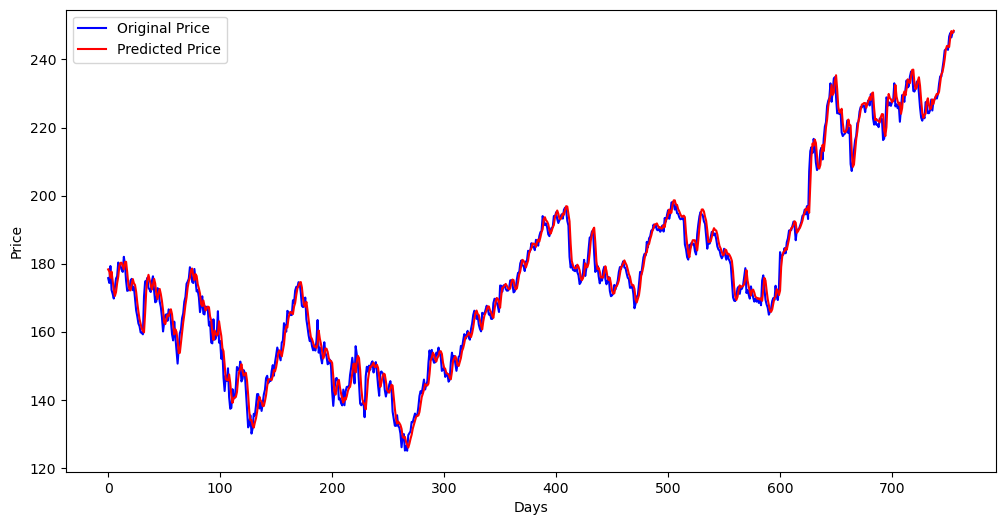

In [97]:
# Check the accuracy of the model using plot

plt.figure(figsize=(12, 6));
plt.plot(y_test, 'b', label='Original Price');
plt.plot(y_predicted, 'r', label='Predicted Price');
plt.xlabel('Days');
plt.ylabel('Price');
plt.legend();


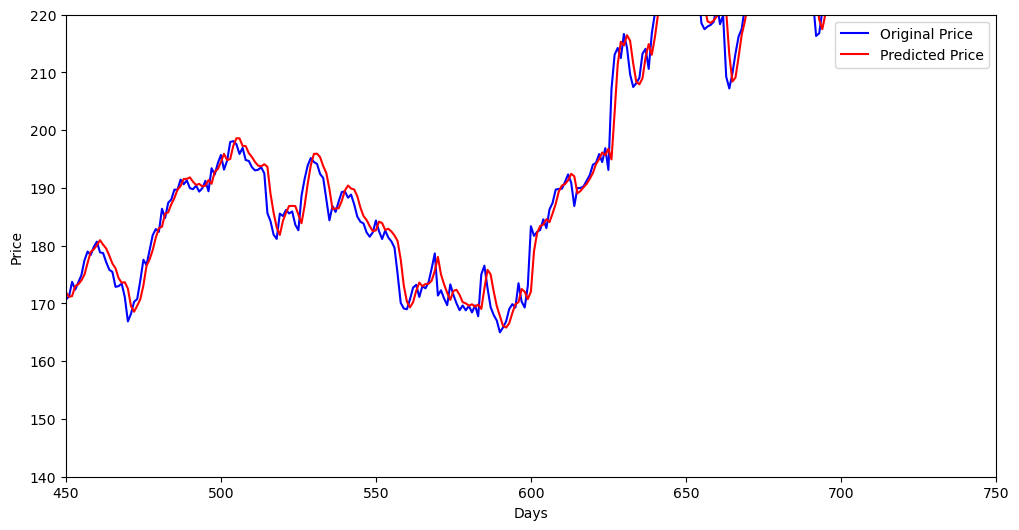

In [98]:
# Zoomed in plot

plt.figure(figsize=(12, 6));
plt.plot(y_test, 'b', label='Original Price');
plt.plot(y_predicted, 'r', label='Predicted Price');
plt.xlabel('Days');
plt.ylabel('Price');
plt.legend();
plt.xlim(450, 750);
plt.ylim(140, 220);

## 10. Model Evaluation

In [103]:
# Mean Square Error (MSE)
from sklearn.metrics import mean_squared_error, r2_score



Calculates the Mean Squared Error (MSE) between the actual target values (y_test) and the predicted values (y_predicted) in a regression problem.

In [104]:
mse = mean_squared_error(y_test, y_predicted)
print(f'Mean Squared Error (MSE)) : {mse}')

Mean Squared Error (MSE)) : 10.305680495583733


In [105]:
# Root Mean Square Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Square Error (RMSE): {rmse}")

Root Mean Square Error (RMSE): 3.2102461736732484


 - Root Mean Square Error (RMSE) is a metric used to measure the average magnitude of errors

 -  It is the square root of the Mean Squared Error (MSE), allowing the error to be interpreted in the same units as the target variable.


In [107]:
# R-Squared
r2 = r2_score(y_test, y_predicted)

print(f"R-Squared: {r2}")


R-Squared: 0.9864422106968443


R-Squared also known as the coefficient of determination, is a statistical measure that evaluates how well a regression model fits the data. It indicates the proportion of the variance in the dependent variable that is predictable from the independent variables.